# data loading

In [2]:
#data collected from Road traffic statistics: https://roadtraffic.dft.gov.uk/downloads
#file contains data for number of vehicles that travel past the count point (in both directions) on an average day of the year.
import pandas as pd

df = pd.read_csv('dft_traffic_counts_aadf.csv')
df.head()





,Count_point_id,Year,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,Road_category,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,6750,2014,6,London,E12000007,96,Islington,E09000019,A201,PA,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,E12000007,104,Lewisham,E09000023,A2,PA,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,E12000007,178,Kingston upon Thames,E09000021,A240,PA,...,175,1589,251,35,13,2,4,19,325,12951
3,16544,2014,5,North West,E12000002,85,Manchester,E08000003,A57,PA,...,911,1931,239,53,105,25,107,47,576,16107
4,27765,2014,6,London,E12000007,57,Barnet,E09000003,A5109,PA,...,302,1651,246,12,12,0,1,1,273,19276


# EDA-analysis

In [3]:
# looking at the columns we will work with
df.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [4]:
#checking data quality in regards to null values
df.isnull().sum()

Count_point_id                       0
Year                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        121975
End_junction_road_name          121964
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  121499
Link_length_miles               121499
Estimation_method                    0
Estimation_method_detailed           0
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches                    0
LGVs                     

Text(0.5, 1.0, 'UK daily traffic average (mileage)')

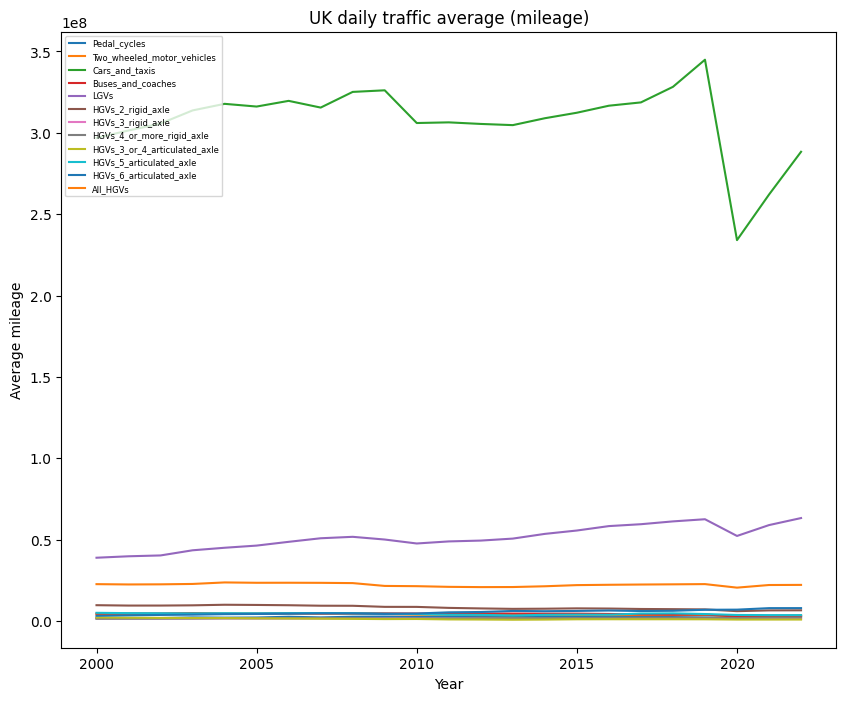

In [5]:
#list of vehicle types in the data

veh_lst = ['Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs']
#look at the average mileage of a road junction in the view of different type of vehicles
import matplotlib.pyplot  as plt
veh_df = df.groupby('Year')[veh_lst].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(veh_df, label = veh_lst)
ax.legend(loc = 'upper left', prop={'size': 6})
plt.xlabel('Year')
plt.ylabel('Average mileage')
plt.title('UK daily traffic average (mileage)')



<Axes: title={'center': 'All motor vehicles average daily traffic (mileage)'}, xlabel='Year'>

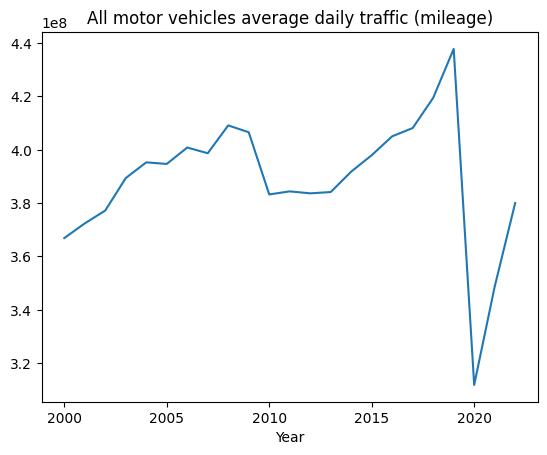

In [6]:
# a view of all motor vehicle average mileage in the past years
df_all = df.groupby('Year')['All_motor_vehicles'].sum()
df_all.plot(title='All motor vehicles average daily traffic (mileage)')

In [155]:
# Now we want to look at spacial distribution by local authority code of the UK traffic in the past year
count = df.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
count_2022 = count[count['Year'] == 2022]
count_2022

,Year,Local_authority_code,All_motor_vehicles
4517,2022,E06000001,377406
4518,2022,E06000002,1380175
4519,2022,E06000003,436935
4520,2022,E06000004,1523242
4521,2022,E06000005,594081
...,...,...,...
4718,2022,W06000020,336531
4719,2022,W06000021,793073
4720,2022,W06000022,1370961
4721,2022,W06000023,537976


In [164]:
#importing wards data to geopandas for plotting
#importing postcode data to map wards to postcodes
import geopandas as gpd
map = gpd.read_file('Wards_December_2023_Boundaries_UK_BFC_9190024445622031540/WD_DEC_2023_UK_BFC.shp')
LAD = pd.read_csv("Middle_Layer_Super_Output_Area_(2021)_to_Ward_to_LAD_(May_2023)_Lookup_in_England_and_Wales.csv")

# Map the wards with the local authority code
merge = pd.merge(map, LAD[['WD23CD', 'LAD23CD']], how='left', on='WD23CD')
merge.drop_duplicates(subset='WD23CD', keep='first', inplace=True)

# now we can merge the traffic count to the wards on the lac
merge_2 = pd.merge(merge, count_2022[['Local_authority_code', 'All_motor_vehicles']], how='left', left_on='LAD23CD',right_on='Local_authority_code')
merge_2.drop_duplicates(subset='WD23CD', keep='first', inplace=True)

In [165]:
# Create a spacial view
fig, ax = plt.subplots(1, figsize=(10, 10))

,WD23CD,WD23NM,WD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,LAD23CD,Local_authority_code,All_motor_vehicles
0,E05000932,Ainsdale,None,330510,412099,-3.05155,53.6008,0b857405-c9c5-41dc-9d0d-9510ce8e6bb2,"POLYGON ((333004.896 413223.595, 332995.002 41...",E08000014,E08000014,1305318.0
1,E05000933,Birkdale,None,333046,414534,-3.01375,53.6231,9ca5532b-6405-4781-b653-e6da30952cf4,"POLYGON ((334138.402 414944.403, 334101.300 41...",E08000014,E08000014,1305318.0
2,E05000934,Blundellsands,None,330806,399928,-3.04438,53.4915,11931abf-4470-46f9-a8b6-893519154ebe,"POLYGON ((332044.396 399981.496, 332044.998 39...",E08000014,E08000014,1305318.0
3,E05000935,Cambridge,None,334745,419336,-2.98908,53.6664,8bb5d5fc-e876-4657-a671-d902cdf322bf,"POLYGON ((335388.299 421924.353, 335395.910 42...",E08000014,E08000014,1305318.0
4,E05000936,Church,None,332033,397634,-3.02539,53.4711,76397e39-1909-4041-8328-8349de1f13d6,"POLYGON ((332791.399 398377.705, 332787.903 39...",E08000014,E08000014,1305318.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8436,W05001796,St Arvans,Llanarfan,352206,199469,-2.69284,51.6919,e7fce600-b078-43f7-a377-32676d4e5c4a,"POLYGON ((353870.761 205106.999, 353869.659 20...",W06000021,W06000021,793073.0
8437,W05001797,St Kingsmark,Llangynfarch,352792,194843,-2.68374,51.6504,c097dbac-92c3-4b1e-a5cd-6e324ffdff22,"POLYGON ((352660.888 196025.861, 352662.040 19...",NaN,NaN,NaN
8438,W05001798,Town,Y Dref,350812,212580,-2.71486,51.8097,5f8af1a3-e4f9-440e-bedd-592c2647bdc4,"POLYGON ((351948.073 213452.162, 351921.804 21...",W06000021,W06000021,793073.0
8439,W05001799,West End,West End,347579,187362,-2.75795,51.5827,bc934c61-4530-44e0-8b2b-2d180e71cf9c,"POLYGON ((347599.584 187974.644, 347596.350 18...",NaN,NaN,NaN


In [141]:
map

,WD23CD,WD23NM,WD23NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E05000932,Ainsdale,None,330510,412099,-3.05155,53.6008,0b857405-c9c5-41dc-9d0d-9510ce8e6bb2,"POLYGON ((333004.896 413223.595, 332995.002 41..."
1,E05000933,Birkdale,None,333046,414534,-3.01375,53.6231,9ca5532b-6405-4781-b653-e6da30952cf4,"POLYGON ((334138.402 414944.403, 334101.300 41..."
2,E05000934,Blundellsands,None,330806,399928,-3.04438,53.4915,11931abf-4470-46f9-a8b6-893519154ebe,"POLYGON ((332044.396 399981.496, 332044.998 39..."
3,E05000935,Cambridge,None,334745,419336,-2.98908,53.6664,8bb5d5fc-e876-4657-a671-d902cdf322bf,"POLYGON ((335388.299 421924.353, 335395.910 42..."
4,E05000936,Church,None,332033,397634,-3.02539,53.4711,76397e39-1909-4041-8328-8349de1f13d6,"POLYGON ((332791.399 398377.705, 332787.903 39..."
...,...,...,...,...,...,...,...,...,...
8436,W05001796,St Arvans,Llanarfan,352206,199469,-2.69284,51.6919,e7fce600-b078-43f7-a377-32676d4e5c4a,"POLYGON ((353870.761 205106.999, 353869.659 20..."
8437,W05001797,St Kingsmark,Llangynfarch,352792,194843,-2.68374,51.6504,c097dbac-92c3-4b1e-a5cd-6e324ffdff22,"POLYGON ((352660.888 196025.861, 352662.040 19..."
8438,W05001798,Town,Y Dref,350812,212580,-2.71486,51.8097,5f8af1a3-e4f9-440e-bedd-592c2647bdc4,"POLYGON ((351948.073 213452.162, 351921.804 21..."
8439,W05001799,West End,West End,347579,187362,-2.75795,51.5827,bc934c61-4530-44e0-8b2b-2d180e71cf9c,"POLYGON ((347599.584 187974.644, 347596.350 18..."


In [140]:
LAD

,MSOA21CD,MSOA21NM,MSOA21NMW,WD23CD,WD23NM,WD23NMW,LAD23CD,LAD23NM,LAD23NMW,ObjectId
0,E02002489,Hartlepool 007,NaN,E05013038,Burn Valley,NaN,E06000001,Hartlepool,NaN,1
1,E02002490,Hartlepool 008,NaN,E05013041,Foggy Furze,NaN,E06000001,Hartlepool,NaN,2
2,E02002483,Hartlepool 001,NaN,E05013042,Hart,NaN,E06000001,Hartlepool,NaN,3
3,E02002484,Hartlepool 002,NaN,E05013043,Headland & Harbour,NaN,E06000001,Hartlepool,NaN,4
4,E02002491,Hartlepool 009,NaN,E05013044,Manor House,NaN,E06000001,Hartlepool,NaN,5
...,...,...,...,...,...,...,...,...,...,...
7259,W02000415,Merthyr Tydfil 008,Merthyr Tudful 008,W05001619,Gurnos,Gurnos,W06000024,Merthyr Tydfil,Merthyr Tudful,7260
7260,W02000288,Merthyr Tydfil 006,Merthyr Tudful 006,W05001620,Merthyr Vale,Ynysowen,W06000024,Merthyr Tydfil,Merthyr Tudful,7261
7261,W02000286,Merthyr Tydfil 004,Merthyr Tudful 004,W05001621,Park,Y Parc,W06000024,Merthyr Tydfil,Merthyr Tudful,7262
7262,W02000287,Merthyr Tydfil 005,Merthyr Tudful 005,W05001624,Town,Y Dref,W06000024,Merthyr Tydfil,Merthyr Tudful,7263


In [129]:
LAD_df = pd.merge(map, LAD[['WD23CD', 'LAD23CD']], how='left', on='WD23CD')
LAD_df = LAD_df[LAD_df['LAD23CD'].notna()]

In [139]:
merge = pd.merge(df, LAD_df[['LAD23CD', 'geometry']], how='left', left_on='Local_authority_code', right_on='LAD23CD')
merge.drop_duplicates(subset=['Count_point_id', 'Year'], keep='first', inplace=True)
merge = merge.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
df_test

,Count_point_id,Year,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,Road_category,...,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles,LAD23CD,geometry
0,6750,2014,6,London,E12000007,96,Islington,E09000019,A201,PA,...,204,74,132,15,6,18,449,11916,E09000019,"POLYGON ((531829.813 186453.383, 531837.802 18..."
1,8352,2014,6,London,E12000007,104,Lewisham,E09000023,A2,PA,...,258,36,58,6,11,22,390,9426,E09000023,"POLYGON ((537419.197 172923.800, 537438.300 17..."
2,6807,2014,6,London,E12000007,178,Kingston upon Thames,E09000021,A240,PA,...,251,35,13,2,4,19,325,12951,E09000021,"POLYGON ((520479.999 166909.802, 520481.401 16..."
3,16544,2014,5,North West,E12000002,85,Manchester,E08000003,A57,PA,...,239,53,105,25,107,47,576,16107,E08000003,"POLYGON ((386843.702 399078.704, 386850.496 39..."
4,27765,2014,6,London,E12000007,57,Barnet,E09000003,A5109,PA,...,246,12,12,0,1,1,273,19276,E09000003,"POLYGON ((526287.403 197332.617, 526290.224 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533620,89185,2022,8,Yorkshire and the Humber,E12000003,100,North Yorkshire,E10000023,A63,TA,...,241,63,234,29,235,207,1009,9483,NaN,None
533621,73784,2022,5,North West,E12000002,162,Oldham,E08000004,A6104,PA,...,135,27,29,12,68,41,313,12123,E08000004,"POLYGON ((394488.360 403791.580, 394494.200 40..."
533622,91039,2022,3,Scotland,S92000003,51,Aberdeen City,S12000033,A956,TA,...,278,56,102,14,110,386,945,10016,NaN,None
533623,48774,2020,7,East of England,E12000006,128,Thurrock,E06000034,M25,TM,...,1563,420,311,668,3692,4996,11650,58543,E06000034,"POLYGON ((557061.496 182315.602, 557061.496 18..."


In [151]:
df_test = merge.groupby(['Year', 'Local_authority_code'])['All_motor_vehicles'].sum().reset_index()
df_test

,Year,Local_authority_code,All_motor_vehicles
0,2000,E06000001,323189
1,2000,E06000002,1113835
2,2000,E06000003,367009
3,2000,E06000004,1343000
4,2000,E06000005,601288
...,...,...,...
4718,2022,W06000020,336531
4719,2022,W06000021,793073
4720,2022,W06000022,1370961
4721,2022,W06000023,537976


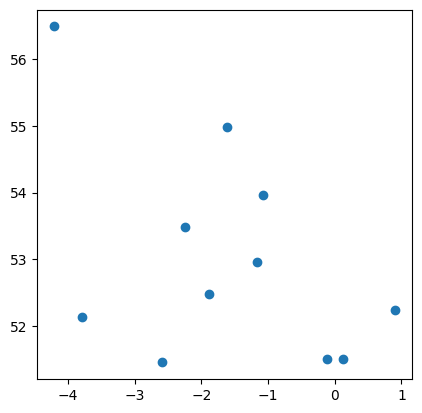

In [45]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Look at the UK daily traffic for this year in a map view
df_region = df[df['Year'] == 2022].groupby('Region_name')['All_motor_vehicles'].sum()



# List of regions in the UK
regions = ['London', 'North West', 'Yorkshire and the Humber', 'Wales',
           'West Midlands', 'Scotland', 'South East', 'East of England',
           'North East', 'South West', 'East Midlands']

# Sample latitude and longitude coordinates (replace with actual coordinates)
latitudes = [51.509865, 53.483959, 53.9590, 52.1307, 52.4862, 56.4907, 51.509865, 52.2405, 54.9784, 51.4545, 52.9548]
longitudes = [-0.118092, -2.244644, -1.0815, -3.7837, -1.8904, -4.2026, 0.118092, 0.9027, -1.6174, -2.5879, -1.1581]

# Create a GeoDataFrame with Point geometries
data = {'Location': regions, 'Latitude': latitudes, 'Longitude': longitudes}
geometry = [Point(lon, lat) for lon, lat in zip(data['Longitude'], data['Latitude'])]

gdf_uk_regions = gpd.GeoDataFrame(data, geometry=geometry, crs=' EPSG:27700')

# Convert Point geometries to Polygons (convex hull)
gdf_uk_regions['geometry'] = gdf_uk_regions.convex_hull

# Plot the GeoDataFrame
gdf_uk_regions.plot()
plt.show()

<Axes: >

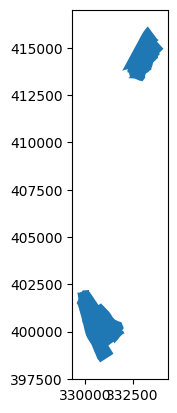

In [87]:

# Example: Merge two wards with ward_ids 1 and 2
ward_ids_to_merge = [1, 2]

# Select the wards to merge
wards_to_merge = map[map['ward_id'].isin(ward_ids_to_merge)]

# Dissolve (merge) the selected wards based on the 'ward_id'
merged_ward = wards_to_merge.dissolve(by='ward_id')

# Update the original GeoDataFrame to exclude the wards that were merged
gdf = map[~map['ward_id'].isin(ward_ids_to_merge)]

# Concatenate (append) the merged ward back to the GeoDataFrame
gdf = pd.concat([gdf, merged_ward.reset_index()], ignore_index=True)

# Plot the GeoDataFrame to visualize the merged wards
gdf[gdf['ward_id'].isin(ward_ids_to_merge)].plot()


In [32]:
from geopandas.tools import geocode
# Geocode to obtain actual latitude and longitude coordinates
gdf_points = geocode(regions, provider='nominatim', user_agent="my_geocoder")